In [83]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [84]:
### Read feature importances from results.pickle and assemble the results as a dataframe
# unpickle results.pickle, which stores a nested dictionary
# the keys are tuples listing each classification job / model combo
with open(os.path.join('..', 'Modeling', 'results.pickle'), 'rb') as file:
    all_results = pickle.load(file)
# assemble a dictionary storing featuer importance information for each classification job / model combo
# the values are dicts of feature importances for that specific model
feature_importance_per_tuple = {tup: all_results[tup]['final_results']['feature_importance_final_importances'] for tup in all_results.keys()}
# format this information as a multiindexed dataframe with information for every model type
final_importances = pd.DataFrame(feature_importance_per_tuple, index=all_results[list(all_results.keys())[0]]['train_test_split'][0].columns.tolist())
final_importances.columns = pd.MultiIndex.from_arrays(list(zip(*final_importances.columns.tolist())), names=['Classification Task', 'Model Type'])
final_importances.index.name = "Feature"
# Break the multiindexed dataframe one for each model type, and display the data for each frame
dataframes = dict()
for file_value, group_df in final_importances.T.groupby(level=1):
    dataframes[file_value] = group_df.droplevel(level='Model Type', axis=0)
    print(f'{file_value} feature importances:')
    display(dataframes[file_value])

KNeighborsClassifier feature importances:


Feature,Lacunarity,Total Length (microns),Endpoints,HGU (microns),Branchpoints,Box-Counting Fractal Dimension,Curvature_50.0,% High Density Matrix,Alignment,Branchpoints/Total Length,Endpoints/Total Length,Average Fiber Length,Average Fiber Thickness
Classification Task,,,,,,,,,,,,,
All Cells,0.049686,0.043003,0.035109,0.038161,0.037172,0.039726,0.031552,0.050013,0.032790,0.037610,0.035300,0.034224,0.042641
L1 and RL,0.151415,0.097297,0.082552,0.095890,0.080267,0.100373,0.096119,0.146175,0.094032,0.093323,0.085173,0.094898,0.114705
L2 and RL,0.100482,0.091905,0.077100,0.091678,0.077799,0.085897,0.082162,0.175496,0.070435,0.078844,0.082094,0.076482,0.108667
L3 and RL,0.067212,0.025728,0.012046,0.021742,0.019518,0.015561,0.005963,0.074371,0.003289,0.008846,0.004898,0.008701,0.008131
L1 and L2 and RL,0.084349,0.070159,0.054664,0.060772,0.056256,0.057548,0.051244,0.103790,0.048059,0.061280,0.054221,0.055141,0.073057
Monoblast and RL,0.025358,0.040278,-0.006718,0.001700,-0.010884,0.005400,-0.010308,0.064454,-0.008477,0.001596,-0.014794,-0.002359,0.014277
Myeloblast and RL,0.100329,0.060102,0.061176,0.052509,0.046959,0.047513,0.063035,0.149432,0.046975,0.069043,0.060562,0.052977,0.081396
All blasts and RL,0.180467,0.149650,0.135151,0.159090,0.153259,0.159813,0.154294,0.224470,0.166099,0.156065,0.150142,0.163007,0.168640


RandomForestClassifier feature importances:


Feature,Lacunarity,Total Length (microns),Endpoints,HGU (microns),Branchpoints,Box-Counting Fractal Dimension,Curvature_50.0,% High Density Matrix,Alignment,Branchpoints/Total Length,Endpoints/Total Length,Average Fiber Length,Average Fiber Thickness
Classification Task,,,,,,,,,,,,,
All Cells,0.054603,0.043116,0.033446,0.038147,0.033811,0.044449,0.017666,0.055946,0.015606,0.031397,0.026396,0.027332,0.043760
L1 and RL,0.133649,0.116050,0.082782,0.095899,0.091123,0.053533,0.042446,0.156577,0.044324,0.106606,0.085614,0.078652,0.110523
L2 and RL,0.132428,0.107650,0.086322,0.097224,0.074405,0.088439,0.054228,0.278718,0.042911,0.102260,0.101811,0.078748,0.121171
L3 and RL,0.152012,0.082997,0.057784,0.049197,0.057389,0.054787,0.034928,0.156448,0.029109,0.034111,0.040303,0.042593,0.034994
L1 and L2 and RL,0.091083,0.093164,0.056147,0.072482,0.052920,0.067122,0.044609,0.123059,0.032203,0.060816,0.053466,0.056164,0.092811
Monoblast and RL,0.119713,0.196656,0.112186,0.118537,0.109672,0.084403,0.018633,0.182660,0.027144,0.101908,0.106199,0.097545,0.089174
Myeloblast and RL,0.141327,0.094538,0.096671,0.126794,0.094823,0.112281,0.041484,0.293470,0.046617,0.154620,0.150113,0.101956,0.155630
All blasts and RL,0.163808,0.144906,0.143959,0.159342,0.141007,0.149673,0.128605,0.224576,0.111745,0.139446,0.126039,0.135960,0.132358


In [85]:
### Helper functions (developed with help from Chat GPT)
# function to sort columns by their sum, so that the most
# important important features show up on the left in each plot
# help from Chat GPT
sort_columns_by_colsum = lambda df: df.loc[:, df.sum().sort_values(ascending=False).index]
# function to clip negative values in dataframes at zero
# function to normalize dataframes by their row sum
normalize = lambda df: df.div(df.sum(axis=1), axis=0)


# function to display heatmaps
def custom_heatmap(df, title, show_title=True, top_labels=False, normalize_rows=True, sort_columns=True):
    # normalize by row sum if desired
    if normalize_rows:
        # in this case, the negative values (which are very small) are clipped
        # so they can't interfere with normalization
        df = df.clip(lower=0)
        # then the values are divided by the sum of their row, showing
        # relative importance of each feature when compared to the others
        df = normalize(df)
    # sort columns if desired
    if sort_columns:
        df = sort_columns_by_colsum(df)
    if normalize_rows:
        # display a heatmap with default colormap
        sns.heatmap(df, vmin=0, vmax=0.45)
    # otherwise, 
    else:
        # display a with coolwarm, since there are some (very slightly) negative values
        sns.heatmap(df, cmap='coolwarm', center=0)
    
    if show_title:
        plt.title(title)
    if top_labels:
        # get the x axis labels to sit on top of the figure nicely at an angle (help from Chat GPT)
        plt.gca().xaxis.set_ticks_position('top')
        plt.gca().xaxis.set_label_position('top')
        for label in plt.gca().get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('left')
            label.set_verticalalignment('bottom')
    else:
        # get the x axis labels to sit on the bottom of the figure at an angle
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


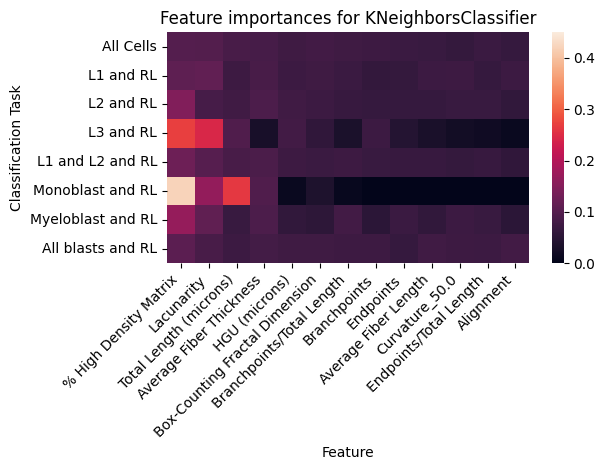

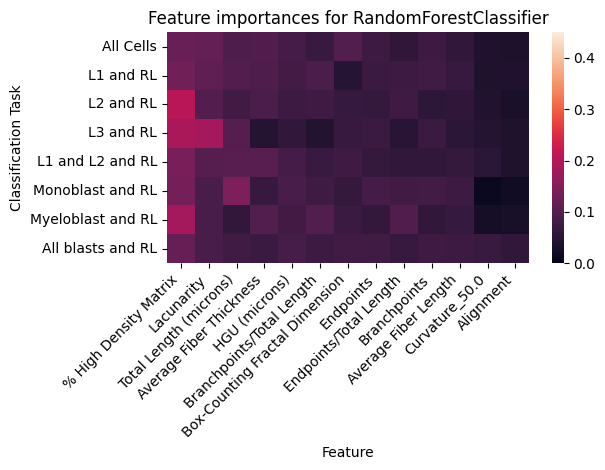

In [86]:
# plot heatmaps
for name, dataframe in dataframes.items():
    custom_heatmap(dataframe, f"Feature importances for {name}")
    plt.savefig(f"{name}_feature_importances_600dpi.png", dpi=600)
    plt.show()